In [40]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

# Warnings
import warnings
warnings.filterwarnings('ignore')

pd.pandas.set_option('display.max_columns', None)

In [41]:
filename = "https://raw.githubusercontent.com/asaniafatma/UTS/main/hasil_review.csv"
df = pd.read_csv(filename, encoding = 'latin-1')
df

,index,restaurant_name,name,rating,review
0,0,KFC Pandanaran Semarang,Alyssa Juana Anggara,5.0,"Place: Big, 2nd floor is restricted while pand..."
1,1,KFC Pandanaran Semarang,Lia Viorensi,5.0,Good place to east KFC they Open Up all night ...
2,2,KFC Pandanaran Semarang,Claudia Prayogo,3.0,Classic Combo (chicken (original flavour only)...
3,3,KFC Pandanaran Semarang,Angellia Shasabilla,5.0,"The location is strategic, not far from the ci..."
4,4,KFC Pandanaran Semarang,Hani Rosidaini,4.0,"Next to the KFC Coffee, so we have more option..."
...,...,...,...,...,...
245,245,KFC,widi astuti,5.0,(Translated by Google) fast service .. friendl...
246,246,KFC,Aida A,4.0,(Translated by Google) The place is comfortabl...
247,247,KFC,Aris Riss,2.0,(Translated by Google) There is no band entert...
248,248,KFC,Erlangga Prastica,5.0,"(Translated by Google) Friendly service, fast ..."


In [42]:
filename = "https://raw.githubusercontent.com/asaniafatma/UTS/main/hasil_review.csv"
df = pd.read_csv(filename)
df.head()

,index,restaurant_name,name,rating,review
0,0,KFC Pandanaran Semarang,Alyssa Juana Anggara,5.0,"Place: Big, 2nd floor is restricted while pand..."
1,1,KFC Pandanaran Semarang,Lia Viorensi,5.0,Good place to east KFC they Open Up all night ...
2,2,KFC Pandanaran Semarang,Claudia Prayogo,3.0,Classic Combo (chicken (original flavour only)...
3,3,KFC Pandanaran Semarang,Angellia Shasabilla,5.0,"The location is strategic, not far from the ci..."
4,4,KFC Pandanaran Semarang,Hani Rosidaini,4.0,"Next to the KFC Coffee, so we have more option..."


Preprocessing Data

Cleaning The Text

In [43]:
import string
import re

In [44]:
def clean_Review(Review):
    return re.sub('[^a-zA-Z]', ' ', Review).lower()
  
df['cleaned_review'] = df['review'].apply(lambda x: clean_Review(str(x)))
df['label'] = df['rating'].map({1.0:0, 2.0:0, 3.0:0, 4.0:1, 5.0:1})

Adding additional features - length of, and percentage of punctuations in the text

In [45]:
def count_punct(Review):
    count = sum([1 for char in Review if char in string.punctuation])
    return round(count/(len(Review) - Review.count(" ")), 3)*100
  
df['review_len'] = df['review'].apply(lambda x: len(str(x)) - str(x).count(" "))
df['punct'] = df['review'].apply(lambda x: count_punct(str(x)))
df

,index,restaurant_name,name,rating,review,cleaned_review,label,review_len,punct
0,0,KFC Pandanaran Semarang,Alyssa Juana Anggara,5.0,"Place: Big, 2nd floor is restricted while pand...",place big nd floor is restricted while pand...,1,129,9.3
1,1,KFC Pandanaran Semarang,Lia Viorensi,5.0,Good place to east KFC they Open Up all night ...,good place to east kfc they open up all night ...,1,97,0.0
2,2,KFC Pandanaran Semarang,Claudia Prayogo,3.0,Classic Combo (chicken (original flavour only)...,classic combo chicken original flavour only ...,0,245,5.3
3,3,KFC Pandanaran Semarang,Angellia Shasabilla,5.0,"The location is strategic, not far from the ci...",the location is strategic not far from the ci...,1,189,3.7
4,4,KFC Pandanaran Semarang,Hani Rosidaini,4.0,"Next to the KFC Coffee, so we have more option...",next to the kfc coffee so we have more option...,1,94,5.3
...,...,...,...,...,...,...,...,...,...
245,245,KFC,widi astuti,5.0,(Translated by Google) fast service .. friendl...,translated by google fast service friendl...,1,509,7.1
246,246,KFC,Aida A,4.0,(Translated by Google) The place is comfortabl...,translated by google the place is comfortabl...,1,135,4.4
247,247,KFC,Aris Riss,2.0,(Translated by Google) There is no band entert...,translated by google there is no band entert...,0,124,3.2
248,248,KFC,Erlangga Prastica,5.0,"(Translated by Google) Friendly service, fast ...",translated by google friendly service fast ...,1,108,5.6


Tokenization

In [46]:
def tokenize_Review(Review):
    tokenized_Review = Review.split()
    return tokenized_Review
  
df['tokens'] = df['cleaned_review'].apply(lambda x: tokenize_Review(x))
df.head()

,index,restaurant_name,name,rating,review,cleaned_review,label,review_len,punct,tokens
0,0,KFC Pandanaran Semarang,Alyssa Juana Anggara,5.0,"Place: Big, 2nd floor is restricted while pand...",place big nd floor is restricted while pand...,1,129,9.3,"[place, big, nd, floor, is, restricted, while,..."
1,1,KFC Pandanaran Semarang,Lia Viorensi,5.0,Good place to east KFC they Open Up all night ...,good place to east kfc they open up all night ...,1,97,0.0,"[good, place, to, east, kfc, they, open, up, a..."
2,2,KFC Pandanaran Semarang,Claudia Prayogo,3.0,Classic Combo (chicken (original flavour only)...,classic combo chicken original flavour only ...,0,245,5.3,"[classic, combo, chicken, original, flavour, o..."
3,3,KFC Pandanaran Semarang,Angellia Shasabilla,5.0,"The location is strategic, not far from the ci...",the location is strategic not far from the ci...,1,189,3.7,"[the, location, is, strategic, not, far, from,..."
4,4,KFC Pandanaran Semarang,Hani Rosidaini,4.0,"Next to the KFC Coffee, so we have more option...",next to the kfc coffee so we have more option...,1,94,5.3,"[next, to, the, kfc, coffee, so, we, have, mor..."


In [47]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [48]:
def lemmatize_Review(token_list):
    return " ".join([lemmatizer.lemmatize(token) for token in token_list if not token in set(all_stopwords)])

lemmatizer = nltk.stem.WordNetLemmatizer()
df['lemmatized_review'] = df['tokens'].apply(lambda x: lemmatize_Review(x))
df.head()

,index,restaurant_name,name,rating,review,cleaned_review,label,review_len,punct,tokens,lemmatized_review
0,0,KFC Pandanaran Semarang,Alyssa Juana Anggara,5.0,"Place: Big, 2nd floor is restricted while pand...",place big nd floor is restricted while pand...,1,129,9.3,"[place, big, nd, floor, is, restricted, while,...",place big nd floor restricted pandemic price l...
1,1,KFC Pandanaran Semarang,Lia Viorensi,5.0,Good place to east KFC they Open Up all night ...,good place to east kfc they open up all night ...,1,97,0.0,"[good, place, to, east, kfc, they, open, up, a...",good place east kfc open night came middle nig...
2,2,KFC Pandanaran Semarang,Claudia Prayogo,3.0,Classic Combo (chicken (original flavour only)...,classic combo chicken original flavour only ...,0,245,5.3,"[classic, combo, chicken, original, flavour, o...",classic combo chicken original flavour colesla...
3,3,KFC Pandanaran Semarang,Angellia Shasabilla,5.0,"The location is strategic, not far from the ci...",the location is strategic not far from the ci...,1,189,3.7,"[the, location, is, strategic, not, far, from,...",location strategic not far city center good ta...
4,4,KFC Pandanaran Semarang,Hani Rosidaini,4.0,"Next to the KFC Coffee, so we have more option...",next to the kfc coffee so we have more option...,1,94,5.3,"[next, to, the, kfc, coffee, so, we, have, mor...",next kfc coffee option meal drink floor smokin...


EDA

In [49]:
#  Shape of the dataset, and breakdown of the classes
print(f"Input data has { len(df) } rows and { len(df.columns) } columns")
print(f"Rating 1.0 = { len(df[df['rating']==1.0]) } rows")
print(f"Rating 2.0 = { len(df[df['rating']==2.0]) } rows")
print(f"Rating 3.0 = { len(df[df['rating']==3.0]) } rows")
print(f"Rating 4.0 = { len(df[df['rating']==4.0]) } rows")
print(f"Rating 5.0 = { len(df[df['rating']==5.0]) } rows")

Input data has 250 rows and 11 columns
Rating 1.0 = 5 rows
Rating 2.0 = 9 rows
Rating 3.0 = 27 rows
Rating 4.0 = 85 rows
Rating 5.0 = 124 rows


Number of null in label: 0
Number of null in text: 0


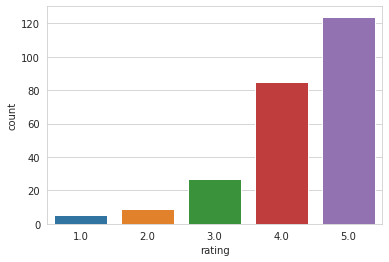

In [50]:
# Missing values in the dataset
print(f"Number of null in label: { df['rating'].isnull().sum() }")
print(f"Number of null in text: { df['review'].isnull().sum() }")
sns.countplot(x='rating', data=df);

Visualizing Word Clouds

In [51]:
from wordcloud import WordCloud

In [52]:
df_negative = df[ (df['rating']==1.0) | (df['rating']==2.0) | (df['rating']==3.0) ]
df_positive = df[ (df['rating']==4.0) | (df['rating']==5.0) ]

#convert to list
negative_list=df_negative['lemmatized_review'].tolist()
positive_list=df_positive['lemmatized_review'].tolist()

filtered_negative = ("").join(str(negative_list)) #convert the list into a string of negative
filtered_negative = filtered_negative.lower()

filtered_positive = ("").join(str(positive_list)) #convert the list into a string of positive
filtered_positive = filtered_positive.lower()


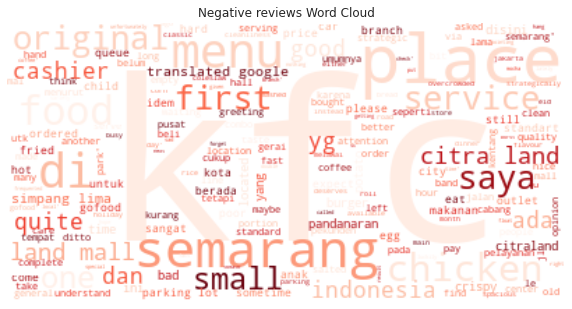

In [53]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(filtered_negative)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Negative reviews Word Cloud")
plt.show()

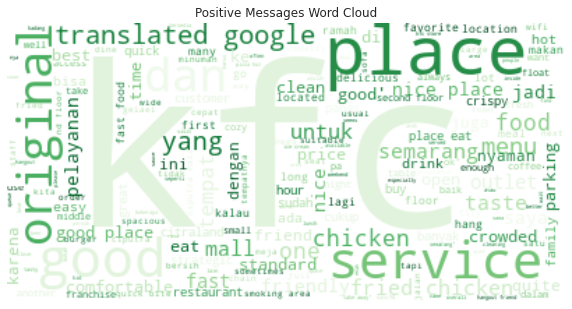

In [54]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Greens").generate(filtered_positive)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Positive Messages Word Cloud")
plt.show()

Feature Extraction from Text

In [55]:
X = df[['lemmatized_review', 'review_len', 'punct']]
y = df['label']
print(X.shape)
print(y.shape)

(250, 3)
(250,)


In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(175, 3)
(75, 3)
(175,)
(75,)


In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df = 0.5, min_df = 2) # ignore terms that occur in more than 50% documents and the ones that occur in less than 2
tfidf_train = tfidf.fit_transform(X_train['lemmatized_review'])
tfidf_test = tfidf.transform(X_test['lemmatized_review'])

X_train_vect = pd.concat([X_train[['review_len', 'punct']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['review_len', 'punct']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

,review_len,punct,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390
0,56,5.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.346136,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.385902,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.357434,0.0,0.404782,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.357434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.00000,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.357434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.429122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.00000
1,126,4.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.326262,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.362802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.211135,0.0,0.0,0.0,0.0,0.0

Training different Classification models

In [60]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Menggunakan Algoritma Multinomia Naive Bayes

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.89      1.00      0.94        67

    accuracy                           0.89        75
   macro avg       0.45      0.50      0.47        75
weighted avg       0.80      0.89      0.84        75



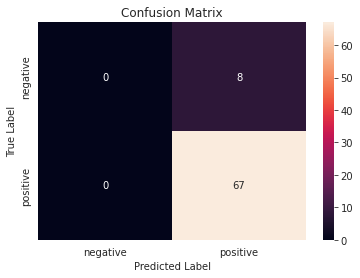

In [61]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train_vect, y_train)
naive_bayes_pred = classifier.predict(X_test_vect)

# Classification Report
print(classification_report(y_test, naive_bayes_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, naive_bayes_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Menggunakan Algoritma Random Forest Classiefier

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.89      1.00      0.94        67

    accuracy                           0.89        75
   macro avg       0.45      0.50      0.47        75
weighted avg       0.80      0.89      0.84        75



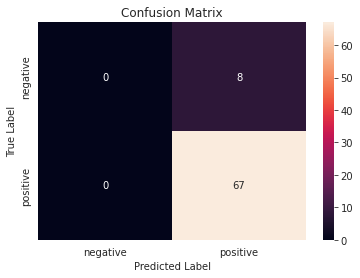

In [62]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=150)
classifier.fit(X_train_vect, y_train)
random_forest_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, random_forest_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, random_forest_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Menggunakan Algoritma Logistic Regression

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.89      1.00      0.94        67

    accuracy                           0.89        75
   macro avg       0.45      0.50      0.47        75
weighted avg       0.80      0.89      0.84        75



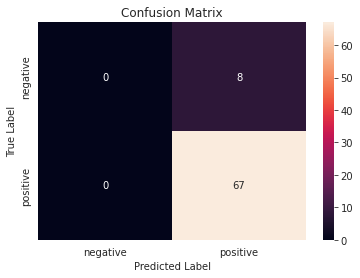

In [63]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_vect, y_train)
log_reg_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, log_reg_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, log_reg_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Menggunakan Algoritma Support Vector Machine

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.89      1.00      0.94        67

    accuracy                           0.89        75
   macro avg       0.45      0.50      0.47        75
weighted avg       0.80      0.89      0.84        75



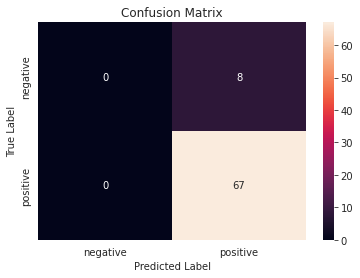

In [64]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_vect, y_train)
svm_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, svm_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, svm_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Menggunakan Algoritma KNN (K NEAREST NEIGHBOUR)

              precision    recall  f1-score   support

           0       0.17      0.12      0.14         8
           1       0.90      0.93      0.91        67

    accuracy                           0.84        75
   macro avg       0.53      0.53      0.53        75
weighted avg       0.82      0.84      0.83        75



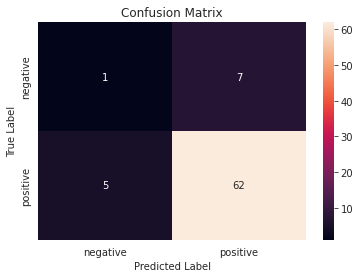

In [65]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train_vect, y_train)
knn_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, knn_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, knn_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Menggunakan algoritma Extra Tress Classifier

              precision    recall  f1-score   support

           0       0.50      0.12      0.20         8
           1       0.90      0.99      0.94        67

    accuracy                           0.89        75
   macro avg       0.70      0.56      0.57        75
weighted avg       0.86      0.89      0.86        75



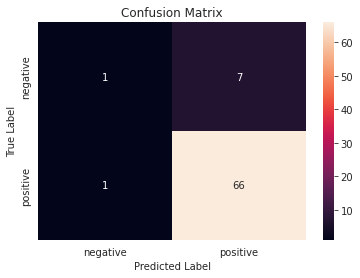

In [66]:
from sklearn.ensemble import ExtraTreesClassifier
classifier = ExtraTreesClassifier(n_estimators=150, random_state=50)
classifier.fit(X_train_vect, y_train)
extra_trees_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, extra_trees_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, extra_trees_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

K=10

In [67]:
from sklearn.model_selection import cross_val_score

models = [
          MultinomialNB(),
          LogisticRegression(),
          RandomForestClassifier(n_estimators = 150),
          SVC(kernel = 'linear'),
          KNeighborsClassifier(n_neighbors = 5),
          ExtraTreesClassifier(n_estimators=150, random_state=50)
         ]
names = ["Naive Bayes", "Logistic Regression", "Random Forest", "SVM", "KNN", "Extra Trees"]
for model, name in zip(models, names):
    print(name)
    for score in ["accuracy", "precision", "recall", "f1"]:
        print(f" {score} - {cross_val_score(model, X_train_vect, y_train, scoring=score, cv=10).mean()} ")
    print()

Naive Bayes
 accuracy - 0.8117647058823529 
 precision - 0.8117647058823529 
 recall - 1.0 
 f1 - 0.8959310850439882 

Logistic Regression
 accuracy - 0.8117647058823529 
 precision - 0.8117647058823529 
 recall - 1.0 
 f1 - 0.8959310850439882 

Random Forest
 accuracy - 0.8117647058823529 
 precision - 0.8117647058823529 
 recall - 1.0 
 f1 - 0.8959310850439882 

SVM
 accuracy - 0.7836601307189541 
 precision - 0.8059640522875817 
 recall - 0.9652380952380952 
 f1 - 0.8779789833822091 

KNN
 accuracy - 0.8055555555555556 
 precision - 0.8304038281979459 
 recall - 0.959047619047619 
 f1 - 0.8885381905821284 

Extra Trees
 accuracy - 0.7944444444444445 
 precision - 0.8286846405228758 
 recall - 0.9438095238095239 
 f1 - 0.8813382714800957 



prediction

In [68]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_cv = cv.fit_transform(df['lemmatized_review']) # Fit the Data
y_cv = df['label']

from sklearn.model_selection import train_test_split
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_cv, y_cv, test_size=0.3, random_state=42)

In [80]:
#Naive Bayes Classifier
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier()

clf.fit(X_train_cv, y_train_cv)
clf.score(X_test_cv, y_test_cv)

0.7866666666666666

In [83]:
data = ["Bad", "Good", "I hate the service, it's really bad", "The nurse is so kind", "small"]
vect = cv.transform(data).toarray()

my_prediction = clf.predict(vect)
print(my_prediction)

[1 1 1 1 1]
